In [1]:
# pip install autokeras

In [2]:
# Importing related libraries
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import tensorflow as tf
import keras
import autokeras as ak
import random
from mpl_toolkits.axes_grid1 import make_axes_locatable
import math

In [3]:
# Set seed to make sure the code to be reproducible
random.seed(123)
np.random.seed(123)
tf.random.set_seed(123)

In [4]:
# Import the dataset
filename = 'norwegian_dataset.csv'
training_data = pd.read_csv(filename, index_col = False)
training_data

,DTC,DTS,GR,LITHOLOGY_GEOLINK,NPHI,RDEP,RHOB,RMED,WELL,Depth
0,115.693207,267.867310,96.910202,6.0,0.391600,0.709900,2.480200,0.665700,15/9-23,2315.461914
1,115.910004,272.334198,108.976501,6.0,0.391100,0.721212,2.502200,0.669454,15/9-23,2315.614502
2,116.315399,280.204407,126.231796,6.0,0.407800,0.728698,2.473100,0.702844,15/9-23,2315.766846
3,117.308701,283.573303,149.429504,6.0,0.407700,0.727200,2.481300,0.730400,15/9-23,2315.919189
4,120.262398,290.746399,163.915497,6.0,0.426000,0.704400,2.470900,0.677300,15/9-23,2316.071533
...,...,...,...,...,...,...,...,...,...,...
184714,102.518501,127.078522,30.631025,1.0,0.166493,0.830020,2.334237,0.788812,7/1-2 S,3159.605469
184715,102.657097,127.074806,32.643269,1.0,0.176284,0.858255,2.365948,0.819950,7/1-2 S,3159.757812
184716,102.701103,127.075409,36.831581,1.0,0.183089,0.901830,2.379198,0.866326,7/1-2 S,3159.910156
184717,101.990501,127.065430,41.760101,1.0,0.175724,0.919743,2.360352,0.888828,7/1-2 S,3160.062500


In [5]:
training_data['LITHOLOGY_GEOLINK'].unique()

array([ 6.,  7.,  5., 19., 16.,  4.,  2.,  1., 11., 12., 13., 18.,  3.,
       10.,  9., 15., 17., 22.])

In [6]:
df = training_data
df.loc[df["LITHOLOGY_GEOLINK"] == 9, "LITHOLOGY_GEOLINK"]  = 8
df.loc[df["LITHOLOGY_GEOLINK"] == 10, "LITHOLOGY_GEOLINK"] = 9
df.loc[df["LITHOLOGY_GEOLINK"] == 11, "LITHOLOGY_GEOLINK"]  = 10
df.loc[df["LITHOLOGY_GEOLINK"] == 12, "LITHOLOGY_GEOLINK"] = 11
df.loc[df["LITHOLOGY_GEOLINK"] == 13, "LITHOLOGY_GEOLINK"] = 12
df.loc[df["LITHOLOGY_GEOLINK"] == 15, "LITHOLOGY_GEOLINK"] = 13
df.loc[df["LITHOLOGY_GEOLINK"] == 16, "LITHOLOGY_GEOLINK"] = 14
df.loc[df["LITHOLOGY_GEOLINK"] == 17, "LITHOLOGY_GEOLINK"] = 15
df.loc[df["LITHOLOGY_GEOLINK"] == 18, "LITHOLOGY_GEOLINK"] = 16
df.loc[df["LITHOLOGY_GEOLINK"] == 19, "LITHOLOGY_GEOLINK"] = 17
df.loc[df["LITHOLOGY_GEOLINK"] == 22, "LITHOLOGY_GEOLINK"] = 18
training_data = df
training_data

,DTC,DTS,GR,LITHOLOGY_GEOLINK,NPHI,RDEP,RHOB,RMED,WELL,Depth
0,115.693207,267.867310,96.910202,6.0,0.391600,0.709900,2.480200,0.665700,15/9-23,2315.461914
1,115.910004,272.334198,108.976501,6.0,0.391100,0.721212,2.502200,0.669454,15/9-23,2315.614502
2,116.315399,280.204407,126.231796,6.0,0.407800,0.728698,2.473100,0.702844,15/9-23,2315.766846
3,117.308701,283.573303,149.429504,6.0,0.407700,0.727200,2.481300,0.730400,15/9-23,2315.919189
4,120.262398,290.746399,163.915497,6.0,0.426000,0.704400,2.470900,0.677300,15/9-23,2316.071533
...,...,...,...,...,...,...,...,...,...,...
184714,102.518501,127.078522,30.631025,1.0,0.166493,0.830020,2.334237,0.788812,7/1-2 S,3159.605469
184715,102.657097,127.074806,32.643269,1.0,0.176284,0.858255,2.365948,0.819950,7/1-2 S,3159.757812
184716,102.701103,127.075409,36.831581,1.0,0.183089,0.901830,2.379198,0.866326,7/1-2 S,3159.910156
184717,101.990501,127.065430,41.760101,1.0,0.175724,0.919743,2.360352,0.888828,7/1-2 S,3160.062500


In [7]:
training_data['LITHOLOGY_GEOLINK'].unique()

array([ 6.,  7.,  5., 17., 14.,  4.,  2.,  1., 10., 11., 12., 16.,  3.,
        9.,  8., 13., 15., 18.])

In [8]:
training_data['LITHOLOGY_GEOLINK'] = training_data['LITHOLOGY_GEOLINK'].astype(int)

In [9]:
training_data

,DTC,DTS,GR,LITHOLOGY_GEOLINK,NPHI,RDEP,RHOB,RMED,WELL,Depth
0,115.693207,267.867310,96.910202,6,0.391600,0.709900,2.480200,0.665700,15/9-23,2315.461914
1,115.910004,272.334198,108.976501,6,0.391100,0.721212,2.502200,0.669454,15/9-23,2315.614502
2,116.315399,280.204407,126.231796,6,0.407800,0.728698,2.473100,0.702844,15/9-23,2315.766846
3,117.308701,283.573303,149.429504,6,0.407700,0.727200,2.481300,0.730400,15/9-23,2315.919189
4,120.262398,290.746399,163.915497,6,0.426000,0.704400,2.470900,0.677300,15/9-23,2316.071533
...,...,...,...,...,...,...,...,...,...,...
184714,102.518501,127.078522,30.631025,1,0.166493,0.830020,2.334237,0.788812,7/1-2 S,3159.605469
184715,102.657097,127.074806,32.643269,1,0.176284,0.858255,2.365948,0.819950,7/1-2 S,3159.757812
184716,102.701103,127.075409,36.831581,1,0.183089,0.901830,2.379198,0.866326,7/1-2 S,3159.910156
184717,101.990501,127.065430,41.760101,1,0.175724,0.919743,2.360352,0.888828,7/1-2 S,3160.062500


In [10]:
# Convert the deep and medium resistivity to be in a form of Log based 10.
training_data["RDEP"] = np.log10(training_data["RDEP"])
training_data["RMED"] = np.log10(training_data["RMED"])
training_data

,DTC,DTS,GR,LITHOLOGY_GEOLINK,NPHI,RDEP,RHOB,RMED,WELL,Depth
0,115.693207,267.867310,96.910202,6,0.391600,-0.148803,2.480200,-0.176721,15/9-23,2315.461914
1,115.910004,272.334198,108.976501,6,0.391100,-0.141937,2.502200,-0.174280,15/9-23,2315.614502
2,116.315399,280.204407,126.231796,6,0.407800,-0.137453,2.473100,-0.153141,15/9-23,2315.766846
3,117.308701,283.573303,149.429504,6,0.407700,-0.138346,2.481300,-0.136439,15/9-23,2315.919189
4,120.262398,290.746399,163.915497,6,0.426000,-0.152181,2.470900,-0.169219,15/9-23,2316.071533
...,...,...,...,...,...,...,...,...,...,...
184714,102.518501,127.078522,30.631025,1,0.166493,-0.080911,2.334237,-0.103026,7/1-2 S,3159.605469
184715,102.657097,127.074806,32.643269,1,0.176284,-0.066384,2.365948,-0.086213,7/1-2 S,3159.757812
184716,102.701103,127.075409,36.831581,1,0.183089,-0.044875,2.379198,-0.062319,7/1-2 S,3159.910156
184717,101.990501,127.065430,41.760101,1,0.175724,-0.036334,2.360352,-0.051182,7/1-2 S,3160.062500


In [11]:
# Convert the compressional and shear sonic logs into P- and S-waves velocities, in m/s
training_data['DTC'] = 100000/training_data['DTC']
training_data['DTS'] = 100000/training_data['DTS']
training_data.rename(columns={"DTC": "Vp", "DTS": "Vs"}, inplace = True)
training_data

,Vp,Vs,GR,LITHOLOGY_GEOLINK,NPHI,RDEP,RHOB,RMED,WELL,Depth
0,864.354985,373.319164,96.910202,6,0.391600,-0.148803,2.480200,-0.176721,15/9-23,2315.461914
1,862.738304,367.195897,108.976501,6,0.391100,-0.141937,2.502200,-0.174280,15/9-23,2315.614502
2,859.731392,356.882324,126.231796,6,0.407800,-0.137453,2.473100,-0.153141,15/9-23,2315.766846
3,852.451690,352.642505,149.429504,6,0.407700,-0.138346,2.481300,-0.136439,15/9-23,2315.919189
4,831.515102,343.942351,163.915497,6,0.426000,-0.152181,2.470900,-0.169219,15/9-23,2316.071533
...,...,...,...,...,...,...,...,...,...,...
184714,975.433690,786.915040,30.631025,1,0.166493,-0.080911,2.334237,-0.103026,7/1-2 S,3159.605469
184715,974.116774,786.938048,32.643269,1,0.176284,-0.066384,2.365948,-0.086213,7/1-2 S,3159.757812
184716,973.699375,786.934316,36.831581,1,0.183089,-0.044875,2.379198,-0.062319,7/1-2 S,3159.910156
184717,980.483463,786.996119,41.760101,1,0.175724,-0.036334,2.360352,-0.051182,7/1-2 S,3160.062500


In [12]:
# Rename the Facies header from "LITHOLOGY_GEOLINK" into "Facies", for convenience.
training_data.rename(columns = {'LITHOLOGY_GEOLINK':'Facies'}, inplace = True)
training_data

,Vp,Vs,GR,Facies,NPHI,RDEP,RHOB,RMED,WELL,Depth
0,864.354985,373.319164,96.910202,6,0.391600,-0.148803,2.480200,-0.176721,15/9-23,2315.461914
1,862.738304,367.195897,108.976501,6,0.391100,-0.141937,2.502200,-0.174280,15/9-23,2315.614502
2,859.731392,356.882324,126.231796,6,0.407800,-0.137453,2.473100,-0.153141,15/9-23,2315.766846
3,852.451690,352.642505,149.429504,6,0.407700,-0.138346,2.481300,-0.136439,15/9-23,2315.919189
4,831.515102,343.942351,163.915497,6,0.426000,-0.152181,2.470900,-0.169219,15/9-23,2316.071533
...,...,...,...,...,...,...,...,...,...,...
184714,975.433690,786.915040,30.631025,1,0.166493,-0.080911,2.334237,-0.103026,7/1-2 S,3159.605469
184715,974.116774,786.938048,32.643269,1,0.176284,-0.066384,2.365948,-0.086213,7/1-2 S,3159.757812
184716,973.699375,786.934316,36.831581,1,0.183089,-0.044875,2.379198,-0.062319,7/1-2 S,3159.910156
184717,980.483463,786.996119,41.760101,1,0.175724,-0.036334,2.360352,-0.051182,7/1-2 S,3160.062500


In [13]:
training_data["WELL"].unique()

array(['15/9-23', '16/10-3 Tyr Central', '16/10-5 Isbjoern',
       '16/2-11 A Johan Sverdrup Appr', '16/2-16', '16/2-6',
       '16/2-7 Johan Sverdrup Appr', '16/5-3 Johan Sverdrup Appr',
       '16/7-6', '25/10-10  Balder Triassic', '25/10-9 Aegis',
       '25/11-19 S  Balder Appr', '25/11-24 Jakob South',
       '25/8-5 S  Jotun', '31/2-19 S', '31/2-21 S', '31/3-4', '32/2-1',
       '33/6-3 S', '34/10-35', '34/11-1', '34/3-1 A', '34/3-2 S',
       '34/3-3 A', '34/4-10 R', '34/5-1 A', '34/5-1 S', '34/6-1',
       '35/11-10', '35/11-11', '35/11-13', '35/11-5', '35/11-6',
       '35/3-7 S', '35/6-2 S', '35/8-6 S', '35/9-10 S', '35/9-2',
       '35/9-5', '35/9-7', '35/9-8', '35/9-9', '7/1-2 S'], dtype=object)

Remove a single well to use as a blind test later. In this case, the blind well is: 15/9-23

In [14]:
blind = training_data[training_data['WELL'] == '32/2-1']
training_data = training_data[training_data['WELL'] != '32/2-1']

In [15]:
blind['Facies'].unique()

array([ 5,  3, 14,  6])

In [16]:
training_data['Facies'].unique()

array([ 6,  7,  5, 17, 14,  4,  2,  1, 10, 11, 12, 16,  3,  9,  8, 13, 15,
       18])

In [17]:
training_data['WELL'] = training_data['WELL'].astype('category')

C:\Users\nandi\anaconda3\envs\tf\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [18]:
# Define facies colors and labels

# 1 = Sandstone, 2 = Silty sand, 3 = Cross Bedded Sst, 4 = Sandy Silt, 5 = Silt
# 6 = Shaly Silt, 7 = Silty Shale, 9 = Chalk, 10 = Porous LST, 11 = LST,
# 12 = Argillaceous Limestone, 13 = Marlstone, 15 = Dolomite, 16 = Calcareous Cement
# 17 = Conglomerate, 18 = Coal, 19 = Cinerite, 22 = Anhydrite

facies_colors = ['#FFFF00','#FDE992','#FFD700','#D2B48C','#FF9999','#FFCC00','#026440',
                 '#3d85c6','#6fa8dc','#9fc5e8','#1e90ff','#00bfff','#44ffff','#36cccc',
                 '#e3b778','#000000', '#227f7f', '#FF77FF']

facies_labels = ['SS', 'SiS', 'CSS', 'SSi', 'Si', 'ShSi', 'SiSh','Ch', 'PLS', 'LS','ALS','M','D','CC',
                 'COM','COAL','CIN','ANH']
#facies_color_map is a dictionary that maps facies labels
#to their respective colors
facies_color_map = {}
for ind, label in enumerate(facies_labels):
    facies_color_map[label] = facies_colors[ind]

def label_facies(row, labels):
    return labels[ int(row['Facies']) -1]
    
training_data.loc[:,'FaciesLabels'] = training_data.apply(lambda row: label_facies(row, facies_labels), axis=1)
training_data.describe()

C:\Users\nandi\anaconda3\envs\tf\lib\site-packages\pandas\core\indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


,Vp,Vs,GR,Facies,NPHI,RDEP,RHOB,RMED,Depth
count,184478.000000,184478.000000,184478.000000,184478.000000,184478.000000,184478.000000,184478.000000,184478.000000,184478.000000
mean,1107.278161,555.299051,84.563754,7.098640,2.046763,0.438948,2.444904,0.441194,2723.474558
std,350.298750,228.740372,42.337080,3.529234,7.860809,0.455169,0.151253,0.456540,801.581173
min,261.159283,97.222720,0.207500,1.000000,-0.015100,-0.915044,1.244003,-0.927363,1292.351929
25%,949.655221,431.246612,57.835450,5.000000,0.206200,0.150549,2.359804,0.151370,2074.212891
50%,1122.713150,580.216174,80.334499,6.000000,0.281700,0.394047,2.473686,0.403217,2624.633057
75%,1250.115674,677.912663,105.731672,10.000000,0.353800,0.674934,2.557400,0.687660,3212.183472
max,5519.963395,2875.440293,1163.366455,18.000000,61.007858,4.466433,3.217700,4.000000,4981.242676


In [19]:
# A function to plot the facies classes, based on the facies_color and facies_label from the previous cell.

def make_facies_log_plot(logs, facies_colors):
    #make sure logs are sorted by depth
    logs = logs.sort_values(by='Depth')
    cmap_facies = colors.ListedColormap(
            facies_colors[0:len(facies_colors)], 'indexed')
    
    ztop=logs.Depth.min(); zbot=logs.Depth.max()
    
    cluster=np.repeat(np.expand_dims(logs['Facies'].values,1), 100, 1)
    
    f, ax = plt.subplots(nrows=1, ncols=8, figsize=(8, 12))
    ax[0].plot(logs.Vp, logs.Depth, '-g')
    ax[1].plot(logs.Vs, logs.Depth, '-')
    ax[2].plot(logs.GR, logs.Depth, '-', color='0.5')
    ax[3].plot(logs.NPHI, logs.Depth, '-', color='r')
    ax[4].plot(logs.RDEP, logs.Depth, '-', color='black')
    ax[5].plot(logs.RMED, logs.Depth, '-', color='orange')
    ax[6].plot(logs.RHOB, logs.Depth, '-', color='cyan')
    im=ax[7].imshow(cluster, interpolation='none', aspect='auto',
                    cmap=cmap_facies,vmin=1,vmax=18)
    
    divider = make_axes_locatable(ax[7])
    cax = divider.append_axes("right", size="20%", pad=0.05)
    cbar=plt.colorbar(im, cax=cax)
    cbar.set_label((6*' ').join(['SS', 'SiS', '  CSS', ' SSi', 'Si', 'ShSi', 'SiSh','Ch', 'PLS', '  LS','  ALS','M','   D','   CC',
                                 'COM','COAL','CIN','ANH']))
    cbar.set_ticks(range(0,1)); cbar.set_ticklabels('')
    
    for i in range(len(ax)-1):
        ax[i].set_ylim(ztop,zbot)
        ax[i].invert_yaxis()
        ax[i].grid()
        ax[i].locator_params(axis='x', nbins=3)
    
    ax[0].set_xlabel("Vp")
    ax[0].set_xlim(logs.Vp.min(),logs.Vp.max())
    ax[1].set_xlabel("Vs")
    ax[1].set_xlim(logs.Vs.min(),logs.Vs.max())
    ax[2].set_xlabel("GR")
    ax[2].set_xlim(logs.GR.min(),logs.GR.max())
    ax[3].set_xlabel("NPHI")
    ax[3].set_xlim(logs.NPHI.min(),logs.NPHI.max())
    ax[4].set_xlabel("RDEP")
    ax[4].set_xlim(logs.RDEP.min(),logs.RDEP.max())
    ax[5].set_xlabel("RMED")
    ax[5].set_xlim(logs.RMED.min(),logs.RMED.max())
    ax[6].set_xlabel("RHOB")
    ax[6].set_xlim(logs.RHOB.min(),logs.RHOB.max())
    ax[7].set_xlabel('Facies')
    
    ax[1].set_yticklabels([]); ax[2].set_yticklabels([]); ax[3].set_yticklabels([])
    ax[4].set_yticklabels([]); ax[5].set_yticklabels([]); ax[6].set_yticklabels([]);
    ax[7].set_yticklabels([]); ax[7].set_xticklabels([])
    f.suptitle('Well: %s'%logs.iloc[0]['WELL'], fontsize=14,y=0.94)
    
    # Do the plot code
    f.savefig('facies_log_plot.svg', format='svg', dpi=1200)

For example, plotting Wells 31/2-19 S and 31/2-19 S using the function for plotting facies classes, as seen in the previous cell. 

Also with the features (seven well logs)

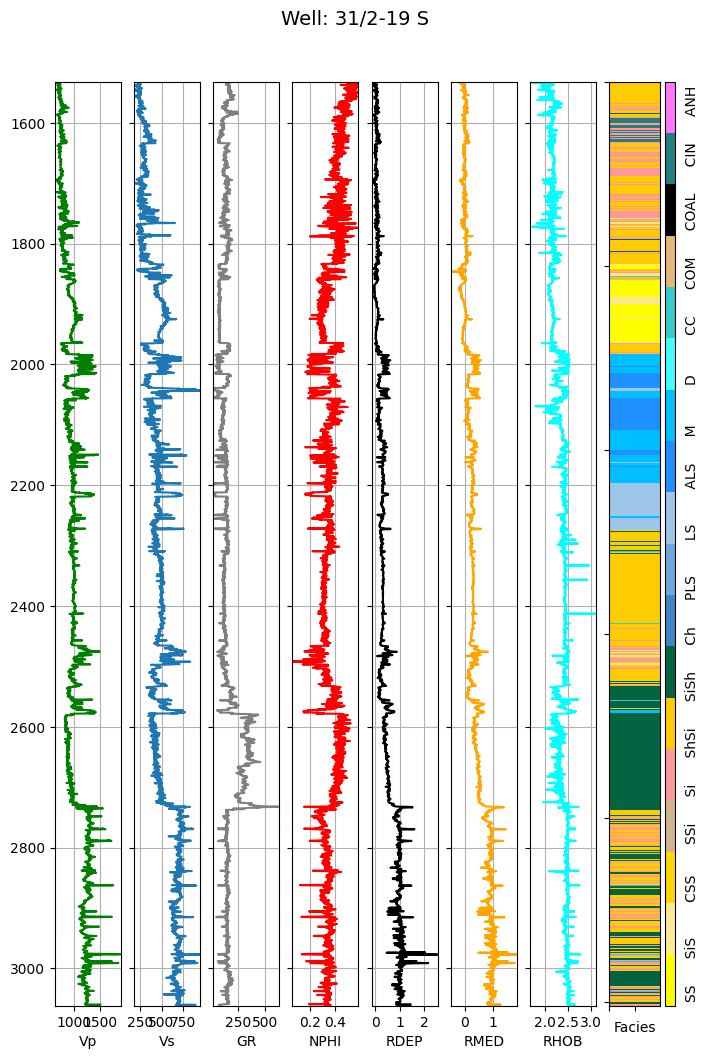

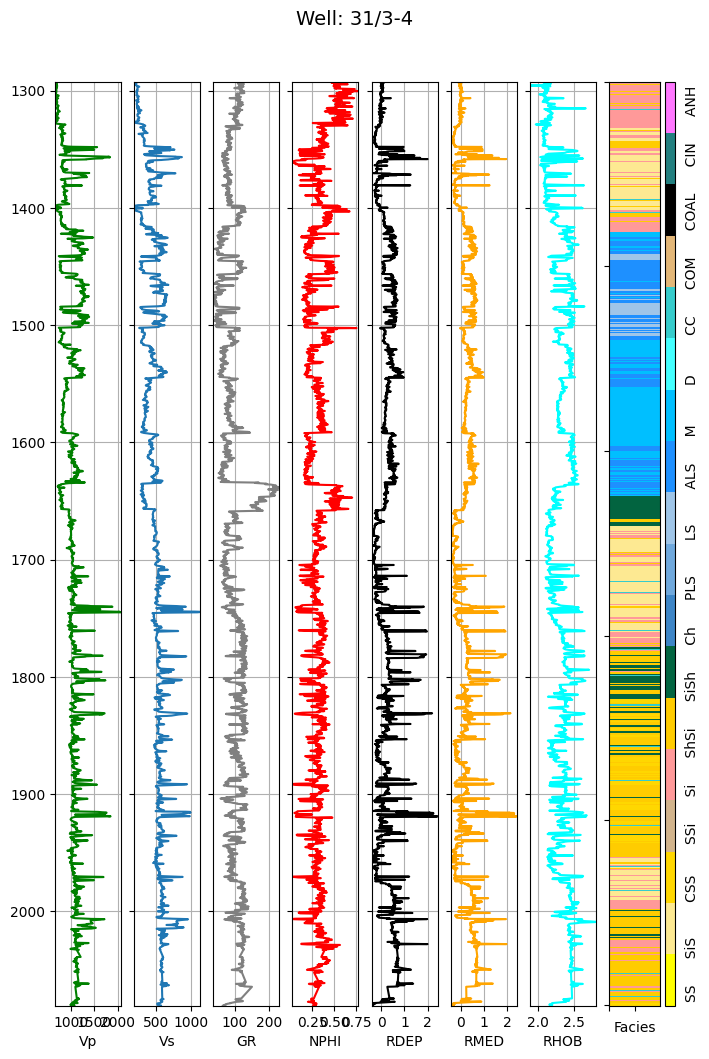

In [20]:
make_facies_log_plot(
    training_data[training_data['WELL'] == '31/2-19 S'],
    facies_colors)

make_facies_log_plot(
    training_data[training_data['WELL'] == '31/3-4'],
    facies_colors)

SS       8282
SiS     12448
CSS      3985
SSi      6174
Si      32372
ShSi    37040
SiSh    25963
Ch       3145
PLS      1401
LS      10676
ALS      8567
M       26083
D        2673
CC       2963
COM        44
COAL      322
CIN      2052
ANH       288
Name: Facies, dtype: int64

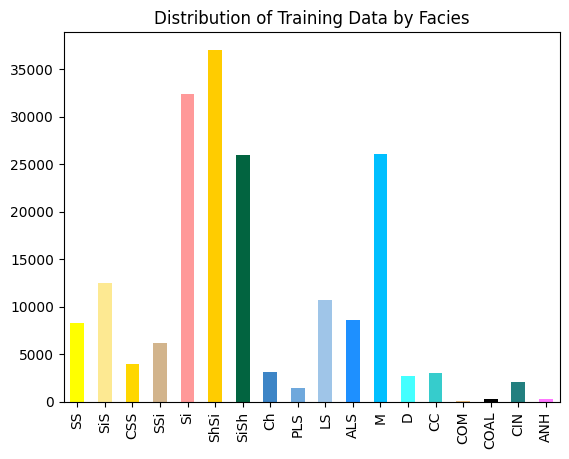

In [21]:
#count the number of unique entries for each facies, sort them by
#facies number (instead of by number of entries)
facies_counts = training_data['Facies'].value_counts().sort_index()
#use facies labels to index each count
facies_counts.index = facies_labels

facies_counts.plot(kind='bar',color=facies_colors, 
                   title='Distribution of Training Data by Facies')
facies_counts

# Conditioning the data set

In [22]:
# correct_labels = training_data['Facies'].values
# correct_labels = training_data[['Vp','Vs']].values
correct_labels = training_data['Vs'].values
correct_labels

feature_vectors = training_data.drop(['Vp','Vs','WELL', 'Depth','Facies','FaciesLabels'], axis=1)
feature_vectors.describe()

,GR,NPHI,RDEP,RHOB,RMED
count,184478.000000,184478.000000,184478.000000,184478.000000,184478.000000
mean,84.563754,2.046763,0.438948,2.444904,0.441194
std,42.337080,7.860809,0.455169,0.151253,0.456540
min,0.207500,-0.015100,-0.915044,1.244003,-0.927363
25%,57.835450,0.206200,0.150549,2.359804,0.151370
50%,80.334499,0.281700,0.394047,2.473686,0.403217
75%,105.731672,0.353800,0.674934,2.557400,0.687660
max,1163.366455,61.007858,4.466433,3.217700,4.000000


In [23]:
# from sklearn import preprocessing

# scaler = preprocessing.StandardScaler().fit(feature_vectors)
# scaled_features = scaler.transform(feature_vectors)

In [24]:
# Perform MinMax scaler for the dataset

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(feature_vectors)

In [25]:
df_scaled_feat = pd.DataFrame(scaled_features,columns=['GR','NPHI','RDEP_log10','RHOB','RMED_log10'])
df_scaled_feat

,GR,NPHI,RDEP_log10,RHOB,RMED_log10
0,0.083138,0.006665,0.142385,0.626336,0.152341
1,0.093512,0.006657,0.143661,0.637482,0.152837
2,0.108347,0.006930,0.144494,0.622738,0.157127
3,0.128290,0.006929,0.144328,0.626893,0.160517
4,0.140744,0.007228,0.141757,0.621624,0.153864
...,...,...,...,...,...
184473,0.026156,0.002976,0.155001,0.552382,0.167298
184474,0.027886,0.003136,0.157700,0.568448,0.170710
184475,0.031487,0.003248,0.161697,0.575162,0.175559
184476,0.035724,0.003127,0.163284,0.565613,0.177819


In [26]:
scaled_features

array([[0.08313799, 0.0066647 , 0.14238493, 0.62633575, 0.15234146],
       [0.09351173, 0.00665651, 0.14366075, 0.63748226, 0.15283702],
       [0.10834658, 0.00693018, 0.14449404, 0.62273838, 0.15712707],
       ...,
       [0.03148674, 0.00324778, 0.16169702, 0.57516162, 0.17555927],
       [0.03572392, 0.00312708, 0.16328424, 0.56561314, 0.17781941],
       [0.03197682, 0.00332957, 0.16182188, 0.55177223, 0.176841  ]])

In [27]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
        scaled_features, correct_labels, test_size=0.2, random_state=123)

In [28]:
x_train

array([[0.05767286, 0.00405421, 0.22559383, 0.65242883, 0.25095924],
       [0.071057  , 0.00449674, 0.34468952, 0.66380897, 0.38222339],
       [0.08613167, 0.00403125, 0.26038084, 0.66929139, 0.29587748],
       ...,
       [0.04214652, 0.0045573 , 0.20447165, 0.54795417, 0.23235545],
       [0.00914224, 0.00212499, 0.2395565 , 0.67674824, 0.26575466],
       [0.07660819, 0.00512922, 0.15423897, 0.4966805 , 0.16786441]])

In [29]:
import sklearn.metrics as metrics

def print_evaluate(true, predicted):  
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square', r2_square)
    print('__________________________________')
    
def evaluate(true, predicted):
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    return mae, mse, rmse, r2_square

# AutoML Structured Data Classifier (Feed-Forward NN) using AutoKeras
## Version #4: MinMax scaler, 100 trials, 100 epochs.

In [30]:
# Initialize the structured data classifier.
# It tries 10 different models.
reg = ak.StructuredDataRegressor(overwrite=True, max_trials=100)

# Feed the structured data classifier with training data.
reg.fit(x_train, y_train, epochs=3, verbose=1)

# Predict with the best model.
predicted_y = reg.predict(x_test)

# Evaluate the best model with testing data.
print(reg.evaluate(x_test, y_test))

Trial 67 Complete [00h 00m 34s]
val_loss: 27729.908203125

Best val_loss So Far: 25263.625
Total elapsed time: 00h 39m 47s
INFO:tensorflow:Oracle triggered exit
Epoch 1/3
4612/4612 [==============================] - 13s 3ms/step - loss: 53446.5625 - mean_squared_error: 53446.5625
Epoch 2/3
4612/4612 [==============================] - 13s 3ms/step - loss: 27774.4336 - mean_squared_error: 27774.4336
Epoch 3/3
4612/4612 [==============================] - 13s 3ms/step - loss: 26718.2988 - mean_squared_error: 26718.2988
INFO:tensorflow:Assets written to: .\structured_data_regressor\best_model\assets
1153/1153 [==============================] - 2s 2ms/step - loss: 24406.0254 - mean_squared_error: 24406.0254
[24406.025390625, 24406.025390625]


In [31]:
model = reg.export_model()
model.summary()
# numpy array in object (mixed type) is not supported.
# convert it to unicode.

print(type(model))  # <class 'tensorflow.python.keras.engine.training.Model'>

# try:
#     model.save("model_autokeras_facies_best.h5")
# except Exception:
#     model.save("model_autokeras_facies_best", save_format="tf")

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 5)]               0         
                                                                 
 multi_category_encoding (Mu  (None, 5)                0         
 ltiCategoryEncoding)                                            
                                                                 
 normalization (Normalizatio  (None, 5)                11        
 n)                                                              
                                                                 
 dense (Dense)               (None, 512)               3072      
                                                                 
 batch_normalization (BatchN  (None, 512)              2048      
 ormalization)                                                   
                                                             

In [32]:
test_pred = reg.predict(x_test)
train_pred = reg.predict(x_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)

print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

4612/4612 [==============================] - 9s 2ms/step
Test set evaluation:
_____________________________________
MAE: 86.9977324109654
MSE: 24406.03129084633
RMSE: 156.22429801681406
R2 Square 0.5245824650169354
__________________________________
Train set evaluation:
_____________________________________
MAE: 87.99303615029753
MSE: 25629.59418069934
RMSE: 160.09245510235434
R2 Square 0.5124510899224363
__________________________________


## Applying the classification model to the blind data

We held a well back from the training, and stored it in a dataframe called `blind`:

In [33]:
# blind
blind_test = blind.drop(['Vp','Vs','WELL', 'Depth','Facies'], axis=1)
x_blind = scaler.transform(blind_test)
x_blind

array([[0.07489759, 0.00530948, 0.25738315, 0.57936804, 0.28248624],
       [0.0756672 , 0.00527673, 0.24178035, 0.56438269, 0.25919226],
       [0.07741478, 0.00466382, 0.23691903, 0.56584012, 0.25124421],
       ...,
       [0.10390023, 0.00313805, 0.31472551, 0.65688555, 0.34462891],
       [0.10625229, 0.00318729, 0.31197119, 0.64747116, 0.34255938],
       [0.10397532, 0.00329376, 0.31129381, 0.64351479, 0.34147808]])

In [34]:
y_pred_FF_2 = reg.predict(x_blind)

8/8 [==============================] - 0s 2ms/step


In [35]:
blind['Vs']

71878    573.659927
71879    567.605814
71880    550.174595
71881    530.339814
71882    520.258081
            ...    
72114    597.621460
72115    594.078595
72116    589.132812
72117    585.418683
72118    589.614663
Name: Vs, Length: 241, dtype: float64

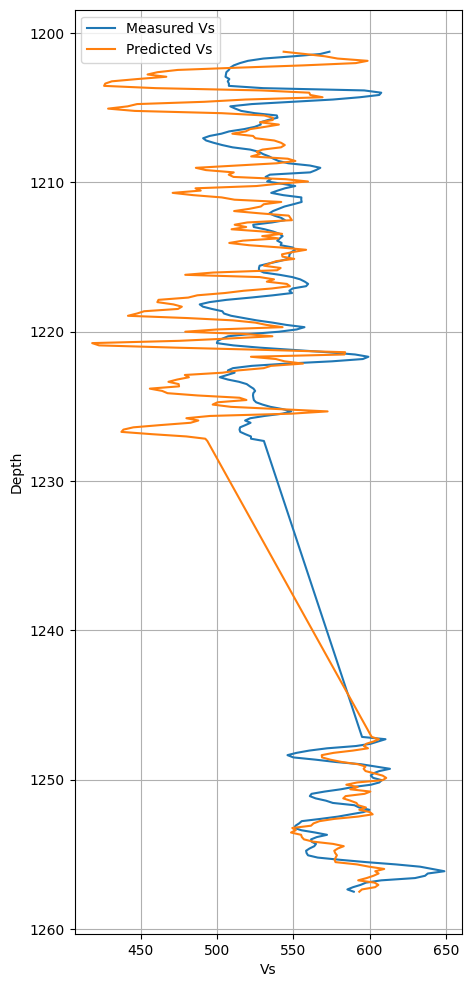

In [36]:
plt.plot(blind['Vs'],blind['Depth'],label="Measured Vs")
plt.plot(y_pred_FF_2,blind['Depth'],label="Predicted Vs")
plt.legend()
plt.gca().invert_yaxis()
plt.grid()
plt.xlabel("Vs")
plt.ylabel("Depth")
plt.legend()
fig = plt.gcf()
fig.set_size_inches(5, 12)
# fig.savefig('Vp_pred_6.png', dpi=100)

In [37]:
y_pred_FF_2 = np.squeeze(y_pred_FF_2)

In [38]:
y_pred_FF_2

array([543.6338 , 557.5493 , 570.6367 , 578.978  , 598.6722 , 590.92896,
       556.57654, 513.97034, 474.17252, 460.88016, 454.38593, 466.70697,
       447.7658 , 430.995  , 426.63947, 425.9157 , 459.73642, 528.88947,
       560.3939 , 561.09814, 569.1349 , 518.6763 , 491.55222, 447.52713,
       441.3433 , 428.53195, 446.0095 , 503.06073, 530.8469 , 536.59045,
       536.49133, 528.1752 , 540.4944 , 531.44946, 521.6566 , 518.77893,
       510.0026 , 523.56854, 525.08813, 537.4755 , 541.93286, 544.37415,
       541.8823 , 529.6953 , 525.8999 , 527.98425, 522.33966, 546.34204,
       551.3551 , 539.18567, 512.232  , 486.07712, 492.64587, 510.9255 ,
       507.6287 , 510.75278, 544.91644, 559.5769 , 539.9446 , 525.83594,
       485.83322, 489.26764, 470.85382, 484.27908, 503.00742, 511.36816,
       542.06647, 530.5663 , 528.6567 , 521.2624 , 511.15836, 528.12244,
       547.00024, 548.0206 , 549.048  , 519.7883 , 511.50534, 519.0794 ,
       509.49194, 530.7516 , 542.6029 , 529.59125, 

In [39]:
blind_meas = blind['Vs'].to_numpy()
blind_meas

array([573.65992687, 567.60581396, 550.17459497, 530.33981368,
       520.25808091, 514.93913581, 510.95565454, 508.63229788,
       507.66344367, 506.07008424, 505.79386971, 505.51386222,
       508.02868422, 506.98559558, 507.73451442, 507.7227138 ,
       530.07244739, 596.45195908, 607.61765776, 606.30131128,
       593.54947859, 575.95559405, 549.29470748, 522.63751074,
       508.63490328, 511.95408412, 515.81785813, 524.71805891,
       539.16347721, 539.59430473, 533.40074637, 528.3570254 ,
       528.61750424, 524.73910773, 517.66478961, 507.91092029,
       502.86911476, 495.12007998, 490.83731892, 492.80586602,
       497.70607591, 503.338643  , 510.12179532, 521.78721994,
       527.50918208, 530.24271047, 534.15347277, 536.91939385,
       540.27530826, 546.67362911, 560.92444346, 567.67735109,
       564.79948565, 561.06096821, 534.6094698 , 531.77854755,
       535.29521118, 532.80395478, 542.46675533, 551.24739321,
       544.43641576, 539.74953567, 535.4712091 , 543.34

In [40]:
print_evaluate(blind_meas, y_pred_FF_2)

MAE: 26.459851996738756
MSE: 1202.6116119835367
RMSE: 34.67869103619017
R2 Square -0.06386591480499049
__________________________________


In [41]:
# Calculate Average Error
# s_vp = Vp_pred / Vp_meas
# s_vs = Vs_pred / Vs_meas
#Error_vp = (abs(1-s_vp)/(1)) * 100

import statistics
s_vs = y_pred_FF_2 / blind_meas
Error_vs = (abs(1 - s_vs)/1) * 100
Error_vs = statistics.mean(Error_vs)

# Pearson's coefficient correlation
Pearson = np.corrcoef(y_pred_FF_2,blind_meas)

print('Average Error Vs =',Error_vs)
print('Pearson =',Pearson[1,0])

Average Error Vs = 4.923153280496358
Pearson = 0.7659866538123188


In [43]:
DF = pd.DataFrame(y_pred_FF_2)
DF.to_csv("well_32_Vs_pred_FF2_T100_E3.csv")